## BF550: Problem Set 02

Question 1: **Oil Price VS Time**

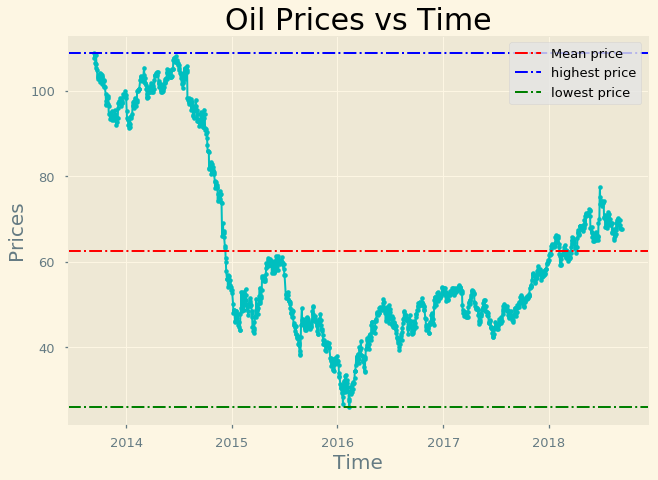

In [31]:
import matplotlib.pyplot as plt
from datetime import datetime

table = pd.read_csv ('oil_price.csv') #reading data
table = table [table ['DCOILWTICO'] != '.'] 

date=[datetime.strptime (d , '%Y-%m-%d').date() for d in table ["DATE"].values] #manipulating date  
price =[float(p) for p in table['DCOILWTICO'].values] #storing prices in float 

avg = sum(price) / len(price); #mean

#plotting in graph

plt.plot(date,price, 'c.-') 
plt.title('Oil Prices vs Time', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Prices', fontsize=20)
plt.style.use('ggplot')
plt.axhline(avg, linestyle='-.', color='red',  label='Mean price', )
plt.axhline(max(price), linestyle='-.', color='blue',  label='highest price')
plt.axhline(min(price), linestyle='-.', color='green',  label='lowest price', )
plt.legend()
plt.show()


Question 2: **Human Microbiome Project**

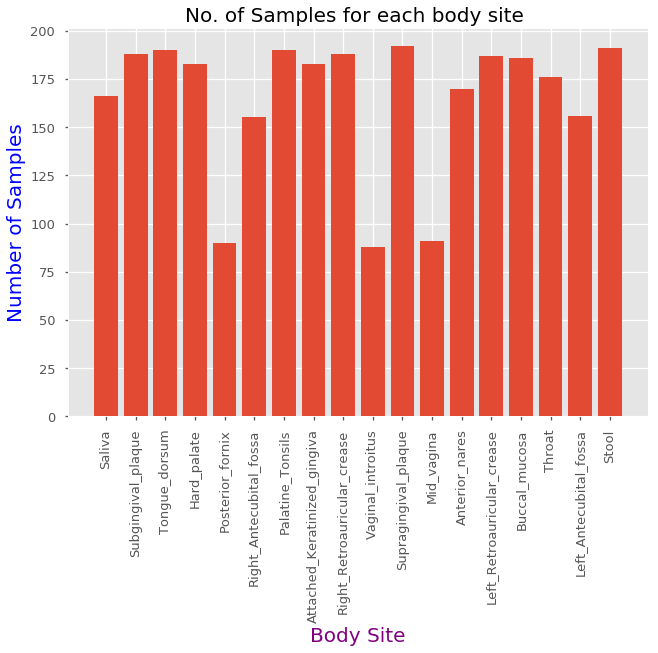

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

each_count = [] # to store the number of sample for each body site in list
count = 0;

data = pd.read_csv( 'v13_map_uniquebyPSN.txt' , sep = '\t')

body_site = data ['HMPbodysubsite'].values # all body site visit list
differen_body_sites = list(set(data['HMPbodysubsite'].values)) # eahc bodt site list

for i in differen_body_sites:
    for j in body_site:
        if i== j:
            count+=1; # counting freq of each body site in the data
    each_count.append(count)
    count=0;

#plotting bar graph 
plt.bar(differen_body_sites,each_count)
plt.xticks(rotation=90) # avoiding overlappin gof x axis lables by rotating to 90 degrees 
plt.ylabel('Number of Samples', fontsize= 20, color='blue')
plt.xlabel('Body Site' , fontsize= 20, color='purple')
plt.title('No. of Samples for each body site ', fontsize=20, color='black')
plt.style.use('Solarize_Light2')
plt.show()

Questions 3: **Random Walk**

In [ ]:
#reading and cleaning the data. Joining the sequneces
with open ("ecoli_genome.fasta", 'rt') as fasta:
    fasta.readline()
    lines=[]
    for line in fasta:
        lines.append(line.strip())
        single=''.join(lines)
    

In [ ]:
import random
import matplotlib.pyplot as plt

x_axis = list (range(100))# x axis for 100 values 
walk = [] #store walk positions 
starting_points = random.sample (range(len(single)-100) , 3) # 3 random start positions

for points in starting_points: # for each start position
    start_pos = [0]; 
    x_pos = 0; # set each iteration to 0
    basepairs = single [points : points + 99] 
    for bp in basepairs: # scoring for basepairs in random walk
        if bp == 'A' or bp == 'T':
            x_pos = x_pos + 1;
        else:
            x_pos = x_pos - 1;
        start_pos.append(x_pos) 
    walk.append(start_pos) # random walk for 3 different positions 

#plotting graphs     
fig, (ax1,ax2)  = plt.subplots( 1 , 2 , figsize = (20 , 10))
ax1.plot(x_axis , walk[0] ,'r' , label = 'WALK 1')
ax1.plot(x_axis , walk[1] ,'b' , label = 'WALK 2')
ax1.plot(x_axis , walk[2] ,'g' , label = 'WALK 3')
ax1.legend()
ax1.set_title('(a)' , fontsize = 30)
ax1.set_xlabel('No. of base pairs travelled', fontsize = 20)
ax1.set_ylabel('Positions' , fontsize = 20)
plt.savefig('Problem3_a.png')